In [1]:
import numpy as np
import sys, time
import matplotlib.pyplot as plt
fft2  = np.fft.fft2
ifft2 = np.fft.ifft2
randn = np.random.randn
import pygl

import scipy.fft
fft2 = scipy.fft.fft2
ifft2 = scipy.fft.ifft2


from matplotlib import rc
rc('text', usetex=True)
fSA=20
font = {'family' : 'normal',
         'weight' : 'bold',
         'size'   : 16}  
rc('font', **font)

In [2]:
 
##
def configPlot(U, fig, n_, i):
    import matplotlib.pyplot as plt
    sp =  fig.add_subplot(2, 4, n_ )   

    im=plt.pcolor(U, cmap=plt.cm.RdBu_r);  plt.clim(-1.1, 1.1); plt.axis('off'); plt.title('T = %1.2E'%(i))
    cbar = plt.colorbar(im,fraction=0.04, pad=0.05,  ticks=[-1, 0, 1])
    cbar.ax.set_title(r'$\phi$' )
    plt.axis('off'); plt.title('T = %1.2E'%(i))

100%|██████████████████████████████████| 100000/100000 [02:39<00:00, 627.25it/s]


total time taken:  159.43685737499982


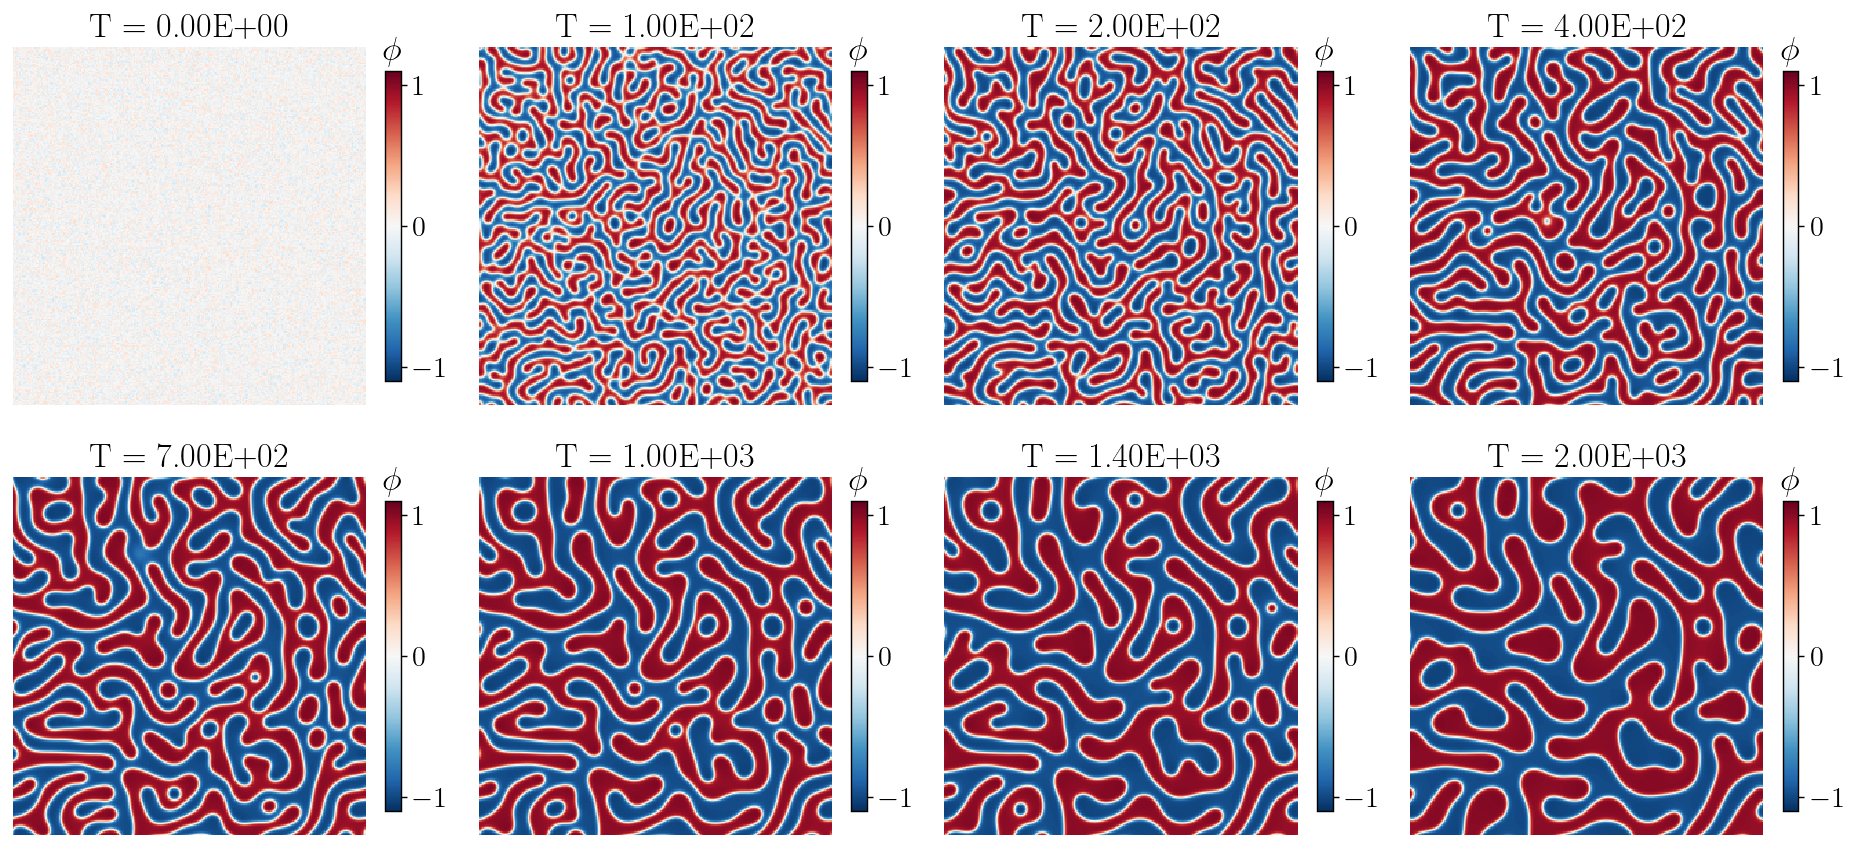

In [3]:
k_tilde, Ng   = 1, 256; 
Nt, dt, Nf = int(1e5), .01, 2000
parameters = {'h':1, 'Ng':Ng, 'a':-1, 'b':1, 'kp':1, 'k_tilde':k_tilde, 'k_c':0.0,
         'Nt':Nt, 'dt':dt, 'Nf':Nf, 'Df':1, 'Ng2':Ng*Ng}


am = pygl.models.FPS_ModelB(parameters);    t1=time.perf_counter();     

phi0= 0.0; u0 = phi0 + 0.2*(1-phi0)*(1-2*np.random.random((Ng,Ng))) 

am.integrate( fft2(u0) )

print ('total time taken: ', time.perf_counter()-t1)

fig = plt.figure(num=None, figsize=(18, 8), dpi=128);
ti=0;      configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 1, ti)
ti=100;     configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 2, ti)
ti=200;     configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 3, ti)
ti=400;     configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 4, ti)
ti=700;    configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 5, ti)
ti=1000;    configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 6, ti)
ti=1400;    configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 7, ti)
ti=1999;    configPlot(am.XX[ti,::].reshape(Ng, Ng), fig, 8, ti);

X1 = am.XX
X2 = am.XX[1999,::].reshape(Ng,Ng)

(0.0, 50.0)

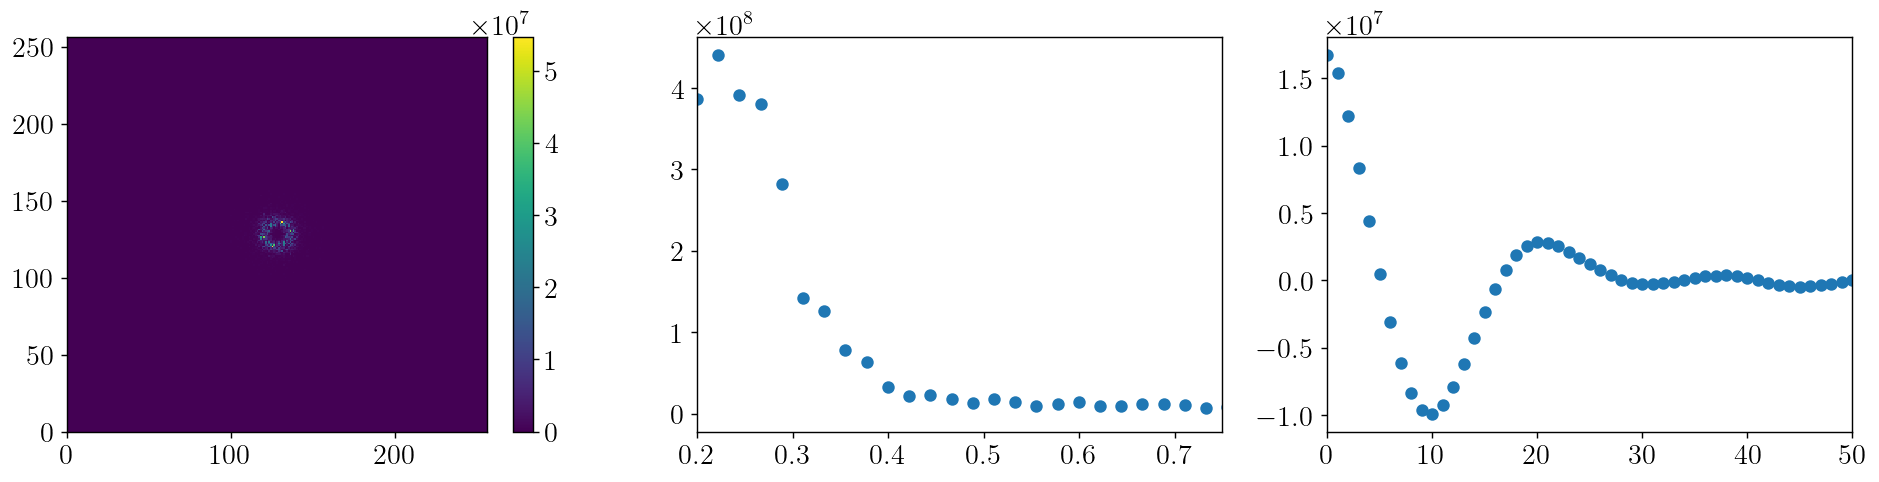

In [9]:
def radial_profile(data, r, bins_N=200):
    ring_brightness, radius = np.histogram(r, weights=data, bins=bins_N)
    return radius[1:], ring_brightness    
    
nBins= 50
ti=1800; dim=2
stFac=np.real(am.structureFactor(am.XX[ti,::].reshape(Ng, Ng), dim))


fig = plt.figure(num=None, figsize=(18, 4), dpi=128);
plt.subplot(131)
plt.pcolor(stFac)
plt.colorbar()


plt.subplot(132)
kx, ky = np.meshgrid(am.kx_s, am.kx_s)
kk = np.sqrt(kx*kx + ky*ky)
a, b = radial_profile(np.real(stFac), kk)
plt.plot(a, b, 'o')
plt.xlim(0.2, .75)




plt.subplot(133)
plt.plot(np.fft.ifft(b), 'o')
plt.xlim(0, 50)